<a href="https://colab.research.google.com/github/faspy/monty_python/blob/master/Aula_037_Teste_A_B_Introdu%C3%A7%C3%A3o_conceitual_e_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 037: Teste A/B - Introdução conceitual e Estatística

**Testes A/B são experimentos que permitem rodar experimentos e comparar de maneira científica, múltiplas versões de um determinado produto, site ou *app***.

Podendo ser vistos como experimentos controlados, que fornecem insumos ao processo de tomada de decisão (*data driven*), geralmente são aplicados para medirem impactos nas alterações feitas e comparar diferentes variações em campanhas de marketing, *features* em aplicativos ou websites.

Apesar de poderem ser aplicados aos mais diferentes tipos de contexto, no caso desta sequência de aulas da Escola de Data Science, iremos explicar **Testes A/B dentro da perspectiva do perspectiva de desenvolvimento de apps, websites e marketing digital.**

> Imagine que você tem uma página de vendas de um curso online. Nessa página, você tem elementos como headline *H1*, uma breve descrição da transformação esperada e um botão com um CTA (*call to action*).

Chega o dia de abrir o carrinho de vendas e... as conversões não saíram como se era esperado. Menos de 1.0\% dos visitantes compraram seu curso.

Como bom aluno do **O Novo Mercado**, você começa imediatamente a se questionar: **"será que se eu trocar a cor do CTA para verde, eu consigo aumentar a minha conversão para pelo menos 1.5%?**

<center><img src="https://i.ibb.co/tYJY4KD/cta-teste-ab.png"></center>

No momento que você decide fazer o seu **Teste A/B**, que você achava que seria "tranquilo", **surgem algumas dúvidas básicas, do tipo:**

* Basta eu desviar metade do meu tráfego para a nova versão, comparar e eleger a página que converteu mais, pura e simplesmente?
* Qual é a confiabilidade desse meu experimento?
* Posso mudar o site inteiro ou apenas uma única *feature*?
* Meu experimento teve significância estatística?
* Como ter certeza que os dados não estão enviesados?
* Fiz merda e tirei conclusões precipitadas?
* Quando abre o Data Science na Prática???

Pois é. 

Para fazer experimentos do tipo Teste A/B, você precisa conhecer alguns fundamentos da estatística antes de simplementes começar a codar. Isso foi providenciado na Aula 036.

## Etapas de um Teste A/B

Não há uma única maneira de se conduzir um Teste A/B, mas várias. Tudo depende da empresa e das pessoas que estão conduzindo o experimento.

No entanto, os passos que irei citar são utilizados comumente, por várias empresas. São eles:

1. Formular a hipótese.
2. Criar um grupo de controle e um grupo de teste.
3. Conduzir o teste, comparar os resultados e rejeitar/não rejeitar a hipótese nula.



In [ ]:
# importar bibliotecas
import pandas as pd
from statsmodels.stats.api import proportion_effectsize, NormalIndPower
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from math import ceil
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# https://research.usu.edu//irb/wp-content/uploads/sites/12/2015/08/A_Researchers_Guide_to_Power_Analysis_USU.pdf

In [ ]:
es = proportion_effectsize(0.10, 0.12)
n_necessario = NormalIndPower().solve_power(es, power=0.8, alpha=0.05, ratio=1)

In [ ]:
print(ceil(n_necessario))

3835


In [ ]:
df = pd.read_excel("/content/dados.xlsx")

In [ ]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,controle,page_a,0
1,804228,2017-01-12 08:01:45.159739,controle,page_a,0
2,661590,2017-01-11 16:55:06.154213,teste,page_b,0
3,853541,2017-01-08 18:28:03.143765,teste,page_b,0
4,864975,2017-01-21 01:52:26.210827,controle,page_a,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15202 entries, 0 to 15201
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       15202 non-null  int64 
 1   timestamp     15202 non-null  object
 2   group         15202 non-null  object
 3   landing_page  15202 non-null  object
 4   converted     15202 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 594.0+ KB


In [ ]:
df.group.value_counts()

teste       7627
controle    7575
Name: group, dtype: int64

In [ ]:
df.groupby("group")["converted"].mean()

group
controle    0.121716
teste       0.123377
Name: converted, dtype: float64

In [ ]:
df.groupby("group")["converted"].std()

group
controle    0.326979
teste       0.328892
Name: converted, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


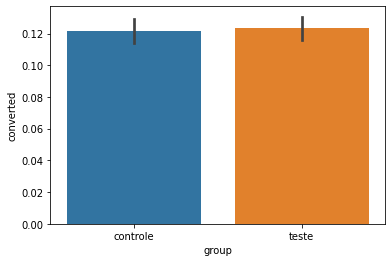

In [ ]:
sns.barplot(df.group, df.converted);

In [ ]:
# amostra significativa, usaremos distribuição normal para calcular p-value (z-test)
controle = df[df.group == 'controle']["converted"]
teste = df[df.group == 'teste']["converted"]

num_controle = controle.shape[0]
num_teste = teste.shape[0]

num_observacoes = [controle.shape[0], teste.shape[0]]
conversoes = [controle.sum(), teste.sum()]

z, p = proportions_ztest(conversoes, num_observacoes)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(conversoes, nobs=num_observacoes, alpha=0.05)

In [ ]:
z

-0.31231970013340365

In [ ]:
p

0.754797569793868

In [ ]:
print(lower_con, upper_con)

0.11435328085001002 0.12907906238431344


In [ ]:
print(lower_treat, upper_treat)

0.11599681017474814 0.13075813934668887
